In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

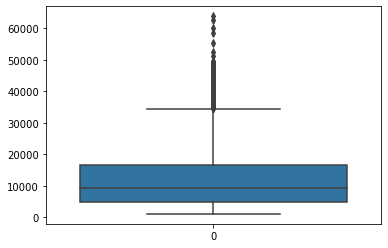

In [4]:
import seaborn as sns
sns.boxplot(data=df['charges'])

<AxesSubplot:>

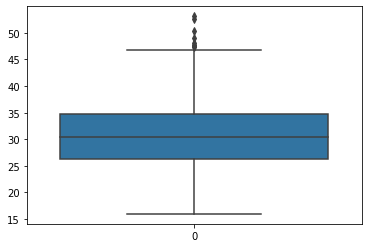

In [5]:
import seaborn as sns
sns.boxplot(data=df['bmi'])

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


F:\Anaconda\envs\tensorflow-proj\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

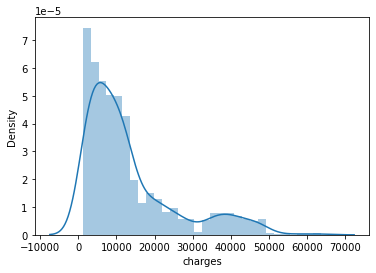

In [7]:
sns.distplot(df['charges'])

In [8]:
df['zscore'] = ( df.charges - df.charges.mean() ) / df.charges.std()
df.head(5)

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,0.298472
1,18,male,33.770,1,no,southeast,1725.55230,-0.953333
2,28,male,33.000,3,no,southeast,4449.46200,-0.728402
3,33,male,22.705,0,no,northwest,21984.47061,0.719574
4,32,male,28.880,0,no,northwest,3866.85520,-0.776512


In [9]:
#df[(df.zscore<-3) | (df.zscore>3)].replace(df[(df.zscore<-3) | (df.zscore>3)]['charges'],df.charges.mean(),inplace=True)

In [10]:
#M=df[(df.zscore<-3) | (df.zscore>3)]

In [11]:
#M

In [12]:
for i in (df.charges[(df.zscore<-3) | (df.zscore>3)]):
    df.charges[(df.zscore<-3) | (df.zscore>3)]=df.charges.median()
    

F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.

In [13]:
df.charges.head(34)

0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
11    27808.72510
12     1826.84300
13    11090.71780
14    39611.75770
15     1837.23700
16    10797.33620
17     2395.17155
18    10602.38500
19    36837.46700
20    13228.84695
21     4149.73600
22     1137.01100
23    37701.87680
24     6203.90175
25    14001.13380
26    14451.83515
27    12268.63225
28     2775.19215
29    38711.00000
30    35585.57600
31     2198.18985
32     4687.79700
33    13770.09790
Name: charges, dtype: float64

In [14]:
df

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,0.298472
1,18,male,33.770,1,no,southeast,1725.55230,-0.953333
2,28,male,33.000,3,no,southeast,4449.46200,-0.728402
3,33,male,22.705,0,no,northwest,21984.47061,0.719574
4,32,male,28.880,0,no,northwest,3866.85520,-0.776512
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,-0.220468
1334,18,female,31.920,0,no,northeast,2205.98080,-0.913661
1335,18,female,36.850,0,no,southeast,1629.83350,-0.961237
1336,21,female,25.800,0,no,southwest,2007.94500,-0.930014


In [15]:
df.bmi[(df.zscore<-3) | (df.zscore>3)]

34      36.400
543     47.410
577     38.095
819     35.530
1146    32.800
1230    34.485
1300    30.360
Name: bmi, dtype: float64

In [16]:
for i in (df.bmi[(df.zscore<-3) | (df.zscore>3)]):
    df.bmi[(df.zscore<-3) | (df.zscore>3)]=df.bmi.median()
    

F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\envs\tensorflow-proj\lib\site-packages\ipykernel_launcher.

In [17]:
df

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,27.900,0,yes,southwest,16884.92400,0.298472
1,18,male,33.770,1,no,southeast,1725.55230,-0.953333
2,28,male,33.000,3,no,southeast,4449.46200,-0.728402
3,33,male,22.705,0,no,northwest,21984.47061,0.719574
4,32,male,28.880,0,no,northwest,3866.85520,-0.776512
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,-0.220468
1334,18,female,31.920,0,no,northeast,2205.98080,-0.913661
1335,18,female,36.850,0,no,southeast,1629.83350,-0.961237
1336,21,female,25.800,0,no,southwest,2007.94500,-0.930014


In [18]:
df['bmi']=(df.bmi - df.bmi.mean() ) / df.bmi.std()

In [19]:
df['bmi']

0      -0.449838
1       0.516760
2       0.389966
3      -1.305286
4      -0.288464
          ...   
1333    0.055691
1334    0.212125
1335    1.023936
1336   -0.795640
1337   -0.257177
Name: bmi, Length: 1338, dtype: float64

In [20]:
df

,age,sex,bmi,children,smoker,region,charges,zscore
0,19,female,-0.449838,0,yes,southwest,16884.92400,0.298472
1,18,male,0.516760,1,no,southeast,1725.55230,-0.953333
2,28,male,0.389966,3,no,southeast,4449.46200,-0.728402
3,33,male,-1.305286,0,no,northwest,21984.47061,0.719574
4,32,male,-0.288464,0,no,northwest,3866.85520,-0.776512
...,...,...,...,...,...,...,...,...
1333,50,male,0.055691,3,no,northwest,10600.54830,-0.220468
1334,18,female,0.212125,0,no,northeast,2205.98080,-0.913661
1335,18,female,1.023936,0,no,southeast,1629.83350,-0.961237
1336,21,female,-0.795640,0,no,southwest,2007.94500,-0.930014


In [21]:
df.drop('zscore',axis=1,inplace=True)

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.449838,0,yes,southwest,16884.92400
1,18,male,0.516760,1,no,southeast,1725.55230
2,28,male,0.389966,3,no,southeast,4449.46200
3,33,male,-1.305286,0,no,northwest,21984.47061
4,32,male,-0.288464,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,0.055691,3,no,northwest,10600.54830
1334,18,female,0.212125,0,no,northeast,2205.98080
1335,18,female,1.023936,0,no,southeast,1629.83350
1336,21,female,-0.795640,0,no,southwest,2007.94500


In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes
#sns.heatmap(df.corr(),annot=True)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

<AxesSubplot:>

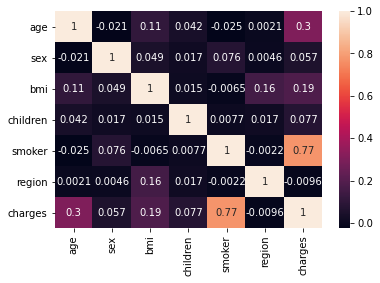

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x =df['smoker']#.drop(['charges'], axis = 1)
y =df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.3, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred=Lin_reg.predict(np.array(x_test).reshape(-1,1))

print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,x_train)))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.explained_variance_score(y_test, y_pred))


[8616.73153134]
[[21408.14615436]]
RMSE: 17241.276837601126
RMSE: 7333.597800888804
0.6464576559925603


In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6464369235457408


F:\Anaconda\envs\tensorflow-proj\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges'>

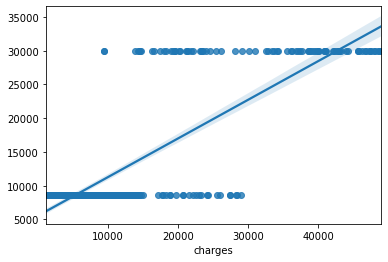

In [27]:
sns.regplot(y_test,y_pred)

In [28]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x =df[['age','bmi','children','smoker']]#.drop(['charges'], axis = 1)
y =df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.3, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train,y_train)
y_pred=Lin_reg.predict(x_test)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.explained_variance_score(y_test, y_pred))


-2042.6243704211101
[  251.2845682   1811.68548654   530.24331922 22109.63544834]
RMSE: 5937.914916402271
0.7689333624326925


F:\Anaconda\envs\tensorflow-proj\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges'>

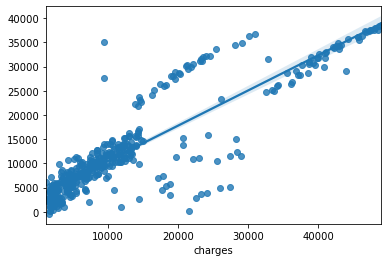

In [29]:
sns.regplot(y_test,y_pred)

F:\Anaconda\envs\tensorflow-proj\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

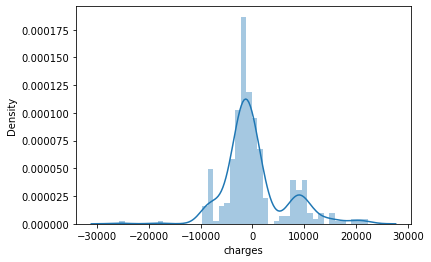

In [30]:
sns.distplot(y_test-y_pred)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.3, random_state=101)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)



5226.900780516275
[ 0.00000000e+00 -1.70769963e+02 -4.12488899e+02  8.08541106e+02
  1.23478488e+04  5.27326766e+00  1.54738866e+01  9.73090983e+00
 -5.62484023e+01 -2.96478813e+02  1.10666564e+01  8.51043162e+03
 -1.08211621e+02 -8.32710683e+01  1.23478488e+04]


In [32]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))

0.8263388488129371


In [33]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_test_pred))

0.8159527563160535


In [1]:
#Q1 = Med['bmi'].quantile(0.25)
#Q3 = Med['bmi'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#Med['bmi'][Med['bmi'] > (Q3 + 1.5 * IQR)]
#for i in (Med['bmi'][Med['bmi'] > (Q3 + 1.5 * IQR)]):
#    Med['bmi'][Med['bmi'] > (Q3 + 1.5 * IQR)]=Med.bmi.mean()
    
#Q1 = Med['charges'].quantile(0.25)
##Q3 = Med['charges'].quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#Med['charges'][Med['charges'] > (Q3 + 1.5 * IQR)]
#for i in (Med['charges'][Med['charges'] > (Q3 + 1.5 * IQR)]):
 #   Med['charges'][Med['charges'] > (Q3 + 1.5 * IQR)]=Med.charges.mean()

ACCURACY : Simple-Linear Regression  44%
           Multiple Linear Regression : 77%
           Polynomial Regression:81%